Simple Linear Regression
===
In-Class Active Learning Activity
Learning Goals:
* Practice using numpy to instantiate and peform operations on arrays
* Encode a one-feature dataset as a design matrix
* Develop a simple linear regression parameterized model which estimates values based on hand-picked parameter values
* Compute the error terms per observation and the aggregate errors for the set of observations
* Iteratively repeat the process of selecting better parameters by hand to improve the model
* Plot the datapoints using matplotlib to display the output
* Plot a line through the data representing a paramaterized linear regression solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Below is a simple dataset with 5 students' scores on an pretest (this set of scores is known as an attibute or *feature* and is shown in column X1), and their resulting scores on a course final exam (this is what we will eventually try to predict - we refer to this as the *label* y).  Your goal is to build a simple linear regression model (by hand) which predicts y based on X1.  You will hand-pick values for 2 coefficients ($\beta_0$ and $\beta_1$) to try to minimize the prediction errors so your model fits well.  Then you will use a graph to display the best line through the data.  Note that $\beta_0$ is the y-intercept and $\beta_1$ is the effect of the aptitude test (X1) on the slope of the line.

| Student (i) | X1 | y  |
|-------------|----|----|
| 1           | 95 | 85 |
| 2           | 85 | 95 |
| 3           | 80 | 70 |
| 4           | 70 | 65 |
| 5           | 60 | 70 |

# STEP 1:
Now build this dataset of features and labels

STUDENT CODE - insert code to hardcode your 5 row x 1 column matrix for X1 (```pretest_scores```) and 5 row x 1 column matrix for final exam scores (```y```) here:

In [6]:
#---------------------------------------------    
pretest_scores = np.array([95,85,80,70,60])  #(5x1 array) you populate
y = np.array([[85,95,70,65,70]])  #(5x1 array) you populate
#---------------END STUDENT CODE

Consider the following generalized equation for linear regression for estimating the regression value when an observation has one feature:


$$\hat y_i=f(X_i )=\beta_0+\beta_1 X_{i,1}$$

where $X_{i,1}$ is the feature value for the $i$'th observation

if, using identity, we multiply each of the terms on the right hand side by $1$ then we get this:

$$\hat y_i=\beta_0 \cdot 1+\beta_1 X_{i,1} \cdot 1$$

which could be rewritten by introducting a *dummy variable*: $\forall i, X_{i,0}=1 $:

$$\hat y_i=\beta_0 \cdot X_{i,0}+\beta_1 X_{i,1} \cdot 1$$

where $X_{i,0}$ is always $1$.  Then, by dividing the last term by $1$, more simply:

$$\hat y_i=\beta_0 \cdot X_{i,0}+\beta_1 X_{i,1}$$

or in matrix multiplication form:

$$\hat y= X \cdot \beta^\intercal$$

where $\hat y$ is a column vector with as many rows as observations, $\beta$ is a row vector with the column count one more than the number of features (1+1 = 2) and $X$ is a *design matrix* with as many rows as observations and the column count is one more than the number of features. 


To implement the computation of $\hat y$ in code we need both $X$ and $\beta$.   

The next code chunk implements the design matrix ```X``` shown below: 

| 1 | 95 |
|---|----|
| 1 | 85 |
| 1 | 80 |
| 1 | 70 |
| 1 | 60 |

In [7]:
#build the design matrix X from pretest_scores
X = np.vstack((np.ones(len(pretest_scores)),pretest_scores)).T  
print('design matrix X:', '\n', X, '\n')

design matrix X: 
 [[ 1. 95.]
 [ 1. 85.]
 [ 1. 80.]
 [ 1. 70.]
 [ 1. 60.]] 



In the next few steps in python, you will implement a matrix to hold your guess for $\beta$ (```beta```), and the code required to perform the matrix multiplication which produces the (guessed) vector $\hat y$ (```yhat```)   Note that you will need to pick the initial values for  ```beta```.  These two beta values are the $y$-intercept and slope of the line (remember your grade school math?)

# STEP 2

STUDENT CODE - Insert code for your ```beta``` guess here.  This should be a 1x2 numpy array:  $[[\beta_0, \beta_1]]$.

In [8]:
#---------------------------------------------          
beta = np.array([[-10,1]])    #guess the betas (1x2 array) you populate: Beta_0 and Beta_1 
#---------------------------------------------      
    
#---------------END STUDENT CODE

In [9]:
#print the Betas and X's
print('Beta','\n', beta, '\n')


Beta 
 [[-10   1]] 



Now that you have selected some guessed parameters for the model, lets see what they would look like on a plot.  You might not be happy with your line, and you might be tempted to change your ```beta``` values now... but lets hold off on that for a bit so we can do it more scientifically later!

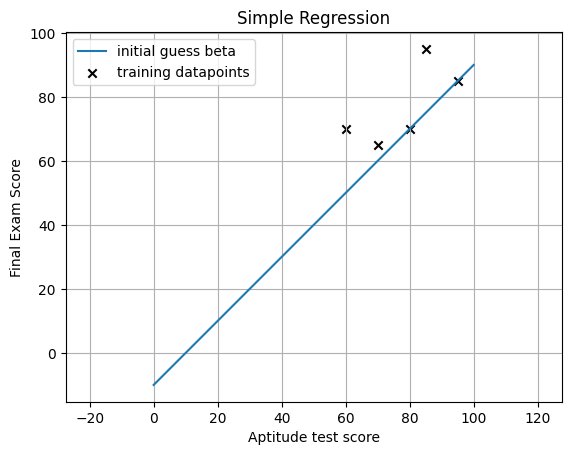

In [10]:
#function to generate line points for plotting
def computeline(intercept,slope,start_x,end_x):
    points_x=[start_x,end_x]
    points_y=[intercept,intercept+slope*end_x]
    return points_x, points_y

def generate_plot(X,y,betas, linelabels=["beta predicted line"], prevfig=None):
    ''' Accepts a list of betas and a list of linelabels - enclose elements in brackets when calling'''
    #make the figure
    if prevfig == None:
        fig = plt.figure()
        
    else:
        fig = prevfig
        
    plt.axis([0.,100.,0.,100.])

    #add the points in black
    plt.scatter(X[:,1],y,c='k',marker='x', label = "training datapoints")


    #add the student line in blue
    for beta, linelabel in zip(betas,linelabels):
        #print(beta, linelabel)
        #print(beta[0,0],beta[0,1])
        points_x,points_y = computeline(beta[0,0],beta[0,1],0,100)
        plt.plot(points_x,points_y, label = linelabel)

    plt.title('Simple Regression')
    plt.ylabel('Final Exam Score')
    plt.xlabel('Aptitude test score')
    plt.axis('equal')
    plt.grid(True)
    #     plt.legend([linelabel,"training datapoints"])
    plt.legend()
    return fig
    
myfig = generate_plot(X,y,[beta],["initial guess beta"])

# myfig.show()

Ok - so we can see our ```beta```-defined line (however bad it may be).  While this gives us a visual cue on how to improve our models performance (e.g. slide the line up or down, increase or decresase the slope,) it doesn't really reveal how good or bad the model would perform compared to other models.  So lets look at some quantitative methods of evaluating our model.

In this next stage we will implement a parameterized *linear regression* model (with parameters $\beta_0$ and $\beta_1$ you selected earlier) to *estimate* what the values of y would be for each of those students.   Note that we actually have *truth data* in the labels (```y```) for each observation, but the linear regression model's parameters will likely give us different predictions.  We can then use these difference between estimations and actuals to quantitatively evaluate and improve our model.

The steps are:
* Implement a simple linear regression model using ```beta``` to compute an estimate of ```y``` (known as ```yhat```) given a pretest score
* Use the model to make estimates for all of the final exam scores for all students
* Determine the residuals for all students's final exam scores
* Compute several performance measures for the model such that these performance measures could allow comparisons with other models
* Guess a better ```beta``` and reevaluate the model... repeating the process until we are happy

First, you will write code to implement the matrix equation ($\hat y=\beta \cdot X$) for computing ```y``` (which is a vector of length 5), from $\beta$ (which is a vector of length 2), and $X$ (which is a 5 x 2 matrix).  You will do this inside of a function called ```estimate``` which requires two values - ```beta``` and ```X```

# STEP 3

STUDENT CODE - Within the function ```estimate```, use ```numpy's``` ```dot()``` function to perform matrix multiplication (not a loop) to compute $\hat y$ (```yhat```) for all observations here.  Hint - determine the desired shape of the output and make the correct matrix multiplication before calling ```dot()```.  You may find it necessary to use ```numpy```'s transpose operator (```.T```) on one or both matrices :

In [16]:
#----------------------------------------------
#estimate yhat for all 5 datapoints
#----------------------------------------------

def estimate( beta=np.zeros((1,2)), X=np.ones((5,2))):
    '''Computes an estimate / prediction of the output value for a function on the input array  which contains each observation in separate rows'''
    #yhat = np.array([[]])  #placeholder for yhat (which is a N x 1 array of floats - a column vector)
    yhat = X@beta.T
    #---------------END STUDENT CODE
    return yhat.T


yhat = estimate(beta,X)

print('yhat','\n',  yhat,'\n')
#print(yhat)

yhat 
 [[85. 75. 70. 60. 50.]] 



Next, compute the residual error terms which are the difference between each guessed ```yhat``` and the label value for that observation (```y```)

# STEP 4

STUDENT CODE - insert your code to compute the residuals below:

Your code should compute the elementwise difference of two same-shaped arrays and return the resulting array... do this as a direct computation without using loops.

In [17]:

def compute_errors(yhat, y):
    '''find the difference betwen predicted and truth which must be arrays of the same shape'''
    ydiff = None  #insert code to compute ydiff which will be a Nx1 array (one error term per prediction error on y)

    #--------------STUDENT CODE - Insert code for computing ydiff here:
    #find the difference betwen predicted and truth 
    ydiff = yhat - y
    
    #---------------END STUDENT CODE
    return ydiff

residuals = compute_errors(yhat, y)
print('yhat: ', '\n', yhat, '\n')
print('y: ', '\n', y, '\n')
print('Residuals: ', '\n', residuals, '\n')

yhat:  
 [[85. 75. 70. 60. 50.]] 

y:  
 [[85 95 70 65 70]] 

Residuals:  
 [[  0. -20.   0.  -5. -20.]] 



hen performing evaluation of the performance of several models we often like to compare single scalar values rather than comparing sets of residual errors from each model.   Common measures include Residual Sum of Squares (RSS), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE).

If you dont know the formulas for how to compute each of these scalar values, look them up before you implement them by hand (dont use built in code or packages to do this... practice writing them by hand)

*Extra challenges*:
* Can you write the formula for RSS as a (```numpy```) matrix multiplication instead of a loop?
* Can you write the formula for MSE as a function operating on RSS? 
* Can you write the formula for RMSE as a function operating on MSE?
* Can you write the formula for MAE as a function?


# STEP 5

STUDENT CODE - insert your code for determining RSS (```rss```), MSE (```mse```),  RMSE (```rmse```) and MAE (```mae```) here

tip:  when returning a scalar, use `np`'s `.item()` function to return the scalar element from inside a numpy array

In [23]:
#----------------------------------------------
# Residual Sum of Squares RSS = the sum of the squared error terms 
rss = None #placeholder for RSS which will be a scalar float

# Mean Squared Error MSE
mse = None  #placeholder for MSE which will be a scalar float

# Root Mean Squared Error RMSE
rmse =  None  #placeholder for RMSE which will be a scalar float

# Mean Absolute Error MAE
mae =  None  #placeholder for RMSE which will be a scalar float

#----------------------------------------------

def compute_rss(residuals):
    '''returns the scalar sum of squared errors '''
    rss = None
    #--------------STUDENT CODE - Insert code for computing rss here:
    rss = np.sum(residuals**2)
    #---------------END STUDENT CODE
    return rss

def compute_mse(residuals):
    '''returns the scalar mean of squared errors '''
    mse = None
    #--------------STUDENT CODE - Insert code for computing mse here:
    mse = np.sum(residuals**2)/len(residuals.T)
    #---------------END STUDENT CODE
    return mse

def compute_rmse(residuals):
    '''returns the square root of the mean of squared errors as a scalar '''
    rmse = None
    #--------------STUDENT CODE - Insert code for computing rmse here:
    rmse = np.sqrt(np.sum(residuals**2)/len(residuals.T))
    #---------------END STUDENT CODE
    return rmse

def compute_mae(residuals):
    '''returns the mean of the absolute value of the errors as a vector '''
    mae = None
    #--------------STUDENT CODE - Insert code for computing mae here:
    mae = np.sum(np.absolute(residuals))/len(residuals.T)
    #---------------END STUDENT CODE
    return mae
    
    
    
rss = compute_rss(residuals)
mse = compute_mse(residuals)
rmse = compute_rmse(residuals)
mae = compute_mae(residuals)
    
print()
print('Residuals: \n', residuals, '\n')
print('RSS: ', rss, '\n')
print('MSE: ', mse, '\n')
print('RMSE: ',rmse, '\n')
print('MAE: ',mae, '\n')



Residuals: 
 [[  0. -20.   0.  -5. -20.]] 

RSS:  825.0 

MSE:  165.0 

RMSE:  12.84523257866513 

MAE:  9.0 



Notice that all the quantiative performance measures are positive.  Also notice that RMSE is in units of the original score, as is MAE, allowing easy-to understand comparisons.  However, RMSE is more affected by large errors in ydiff and less affected by smaller errors in ydiff than MAE.  Quantitative measures of error which involve a squaring term (e.g. RSS, MSE, RMSE) are subject to this exacerbation-of-larger-error-values behavior and models which minimize these squared error terms can be greatly influenced by outliers.

Can you pick a better beta using these error values?

Select a different value for ```newbeta``` in the code cell below and see how the new ```newbeta``` affects both the line and the performance measures.   Choose one of the two measures - RMSE or MAE and see how low you can get it to go by repeatedly choosing a better value for ```newbeta``` and rerunning the cell below.


new_residuals: 
 [[11. -9. 11.  6. -9.]] 

RSS:  440.0 

MSE:  88.0 

RMSE:  9.38083151964686 

MAE:  9.2 



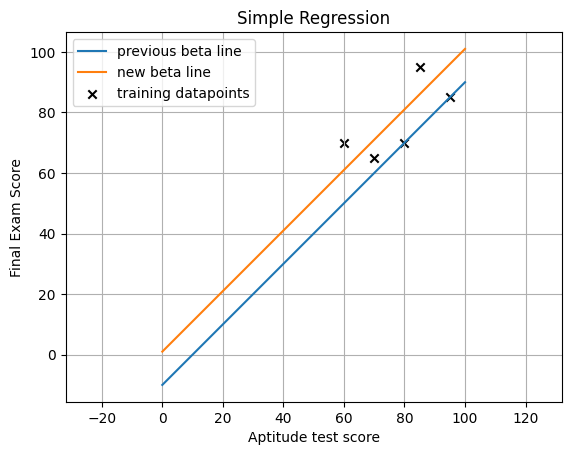

In [26]:

new_beta = np.zeros((1,2))  #placeholder for your the value of newbeta

#--------------STUDENT CODE - Insert hard-coded array for your guess of new_beta here:
new_beta = np.array([[1,1]])
    
#---------------END STUDENT CODE

#plot the graph
newfig = generate_plot(X,y,[beta, new_beta],["previous beta line","new beta line"],myfig)
#compute the new error terms
new_residuals = compute_errors(estimate(new_beta,X),y)

new_rss = compute_rss(new_residuals)
new_mse = compute_mse(new_residuals)
new_rmse = compute_rmse(new_residuals)
new_mae = compute_mae(new_residuals)
    
print()
print('new_residuals: \n', new_residuals, '\n')
print('RSS: ', new_rss, '\n')
print('MSE: ', new_mse, '\n')
print('RMSE: ',new_rmse, '\n')
print('MAE: ',new_mae, '\n')



Great!  Lets recap.  So far you've:
* Guessed some parameters (```beta```) for a simple linear regression model. 
* Plotted a line through the data so you could see what your beta-generated line would look like
* Used your model to compute estimates for the final exam scores from the pretest scores.
* Determined how much each of those predictions was off, using residuals
* Computed several measures of performance by which you could compare models

we've got a working model and we can Lets take a look at its prediction for a new student entering the class with a pre-test score of 80

# STEP 6

STUDENT CODE - insert your code for predicting the final exam score for a student $i$ who's pretest is $X_i$ = 80 

In [28]:
#----------------------------------------------
#make prediction on test score of 80
t = np.array([[1., 80.]]) # this array holds the test point observation
ythat = None #placeholder for the predicted final exam score at this test point
#----------------------------------------------

def predict(beta, t):
    yhat = np.array([[0.]]) #placeholder for prediction
    
    #--------------STUDENT CODE - make prediction on test score t
    yhat = np.sum(beta*t)
    
    #---------------END STUDENT CODE
    return yhat

yhat = predict(beta,t).item() #we know this is a scalar since we are only using one data point to check
yhat_new = predict(new_beta,t).item()  #we know this is a scalar since we are only using one data point to check
    
print('Previous Prediction at 80 is', yhat, '\n')
print('New Prediction at 80 is', yhat_new, '\n')

Previous Prediction at 80 is 70.0 

New Prediction at 80 is 81.0 



Hopefully your prediction using your search for a better (```beta```) based on reducing squared error yielded something closer to the right answer.
Lets see how well you did.

In this next step we are going to use the closed form of Ordinary Least Squares (OLS) Regression to compute the actual best intercept and slope.
Then we can compare how you did to the OLS "ideal" solution.
The comparison will include both a numerical comparison and a visual comparison.  Note that the visual comparison may not reveal
the differences between your best solution the OLS solution if they are very close.

Your Prediction at 80 is 81.0 

Ideal Prediction at 80 is 2221.397260273971 

Difference is  2140.397260273971 



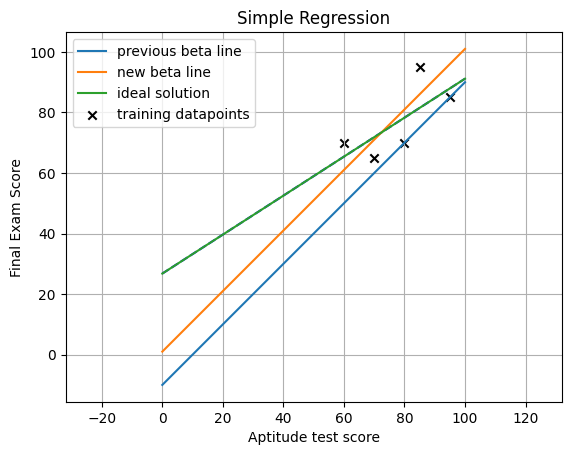

In [32]:

#add the ideal line to a graph based on linear least squares fit
intercept, slope = np.linalg.lstsq(X, y.T, rcond=None)[0]
ideal_beta = np.array([[intercept,slope]])
ideal_x,ideal_y=computeline(intercept,slope,0,100)
plt.plot(ideal_x,ideal_y,ls='--',c='b')
yhat_ideal = predict(ideal_beta,t).item() #we know this is a scalar since we are only using one data point to check

print('Your Prediction at 80 is', yhat_new, '\n')
print('Ideal Prediction at 80 is', yhat_ideal, '\n')
print('Difference is ',yhat_ideal-yhat_new, '\n')

newfig = generate_plot(X,y,[beta, new_beta, ideal_beta],
                       ["previous beta line","new beta line","ideal solution"],myfig)
